<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER7%20%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. K-평균 알고리즘 이해**

**K-평균**은 군집화에서 가장 일반적으로 사용되는 알고리즘입니다. 군집 중심점(센트로이드)이라는 특정한 임의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택합니다. 알고리즘 원리에 대한 설명은 본서와 [링크](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)를 참고하시기 바랍니다.

K-평균의 장점은 쉽고 간결합니다. 단점은 세 가지가 있습니다. 첫째, 거리 기반 알고리즘이므로 피처 개수가 많으면 군집화 정확도가 떨어지므로 PCA로 차원 감소를 적용해야 할 수 있습니다. 둘째, 반복 횟수가 많으면 수행 시간이 매우 느려집니다. 셋째, 군집 개수를 선택할 때 가이드하기 어렵습니다. 


## **1.1. 사이킷런 KMeans 클래스 소개**

In [ ]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

`KMeans` 클래스의 주요 파라미터는 아래와 같습니다.

- `n_clusters`: 군집화할 개수(센트로이드 개수)입니다.

- `init`: 초기에 센트로이드 좌표를 설정할 방식입니다. 일반적으로 `'k-means++'`를 사용하며 디폴트입니다.

- `max_iter`: 최대 반복 횟수입니다. 이 횟수 이전에 모든 센트로이드의 이동이 없으면 종료합니다.

주요 속성은 아래와 같습니다.

- `labels_`: 각 데이터 포인트가 속한 센트로이드 레이블입니다.

- `cluster_centers_`: 각 센트로이드 좌표입니다. 센트로이드 좌표 시각화에 사용됩니다.

## **1.2. K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃 데이터를 준비하겠습니다.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


군집화를 수행하고 각 데이터 포인트가 어떤 센트로이드에 속하는지 확인해 보겠습니다.

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


타깃값과 클러스터 값 개수를 확인해 보겠습니다.

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


타깃 0을 제외한 두 타깃은 클러스터 0과 2로 분산됐습니다.

붓꽃 데이터 세트의 군집화를 시각화해 보겠습니다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


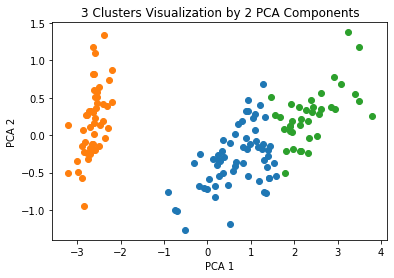

In [ ]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'],
            marker='o', )
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],
            marker='o')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],
            marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

오른쪽 두 피처는 분리된 정도가 주황색 피처보다 덜합니다. 

## **1.3. 군집화 알고리즘 테스트를 위한 데이터 생성**

군집화 알고리즘 테스트 용도로 쓰이는 데이터 생성기는 `make_blobs()`, `make_classification()`, `make_circle()`, `make_moon()`입니다. `make_blobs()`와 `make_classification()`는 클래스 하나에 여러 개의 군집이 분포될 수 있도록 데이터를 생성할 수 있고, `make_circle()`과 `make_moon()`는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만듭니다.

이 중 `make_blobs()` 생성기를 사용하겠습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 피처 데이터 세트인 X, 군집화 값을 가진 타깃 데이터 세트 y를 반환합니다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y 타깃값 분포를 반환합니다.
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


생성한 데이터 세트를 데이터프레임으로 변경하겠습니다.

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


시각화하여 군집화 분포를 확인해 보겠습니다.

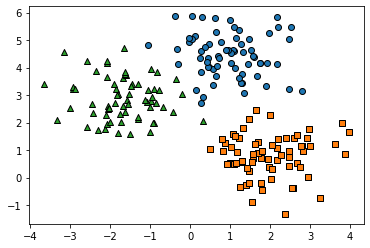

In [ ]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

생성한 데이터 세트에 KMeans 군집화를 수행하고 시각화해 보겠습니다.



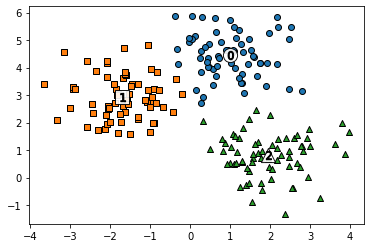

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
# 피처 데이터 세트 `X`를 군집화합니다.
cluster_labels = kmeans.fit_predict(X)
# 군집화한 결과를 새 칼럼에 덧붙입니다.
clusterDF['kmeans_label'] = cluster_labels

# 개별 클러스터의 중심 위치 좌표를 시각화하기 위해 `cluster_centers_` 속성을 추출합니다.
centers = kmeans.cluster_centers_
# 클러스터 레이블 0, 1, 2를 추출합니다.
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    # 군집별 중심 위치 좌표를 시각화합니다.
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


`make_blobs()` 생성기의 `cluster_std` 파라미터를 조정하여 데이터의 표준편차를 바꾸고 시각화해 보겠습니다.

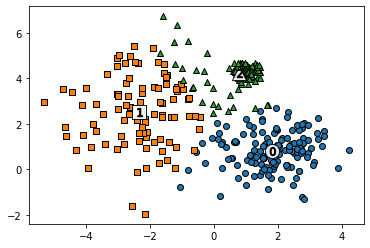

In [ ]:
X, y = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=[0.2, 0.8, 1.6], random_state=0)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
plt.show()

표준편차에 따라 센트로이드에 데이터가 군집하는 정도가 다릅니다.

# **2. 군집 평가(Cluster Evaluation)**

위 붓꽃 데이터 세트의 경우 타깃 레이블이 있으므로 군집화 결과와 이 타깃 레이블을 비교하여 군집화가 이뤄진 정도를 파악할 수 있습니다. 다만 대부분 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블이 없습니다.

아울러 군집화는 분류와 비슷해 보이지만 같지 않습니다. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나, 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나, 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가집니다. 

비지도 학습이므로 성능을 정확하게 평가하기 어렵지만, 군집화가 효율적으로 잘 수행되었는지 평가하기 위해 **실루엣 분석**을 사용합니다.

## **2.1. 실루엣 분석의 개요**

**실루엣 분석(Silhouette analysis)**은 각 군집 간의 거리가 얼마나 효율적으로 분리됐는지를 나타냅니다. 다른 군집간 거리는 떨어져 있고 같은 군집끼리의 데이터는 뭉쳐 있으면 효율적으로 잘 분리된 것입니다. 군집화가 잘 될수록 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있습니다. 

실루엣 분석은 **실루엣 계수**를 기반으로 합니다. 이 계수는 개별 데이터가 가지는 군집화 지표입니다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되었고 다른 군집에 있는 데이터와는 얼마나 멀리 분리되었는지 나타내는 지표입니다. 자세한 설명은 본서와 [링크](https://ariz1623.tistory.com/224)를 참고하시기 바랍니다.

실루엣 분석을 위한 메서드는 아래와 같습니다.

- `sklearn.metrics.silhouette_samples(X, labels, metric=’euclidean’, **kwds)`: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력하면 각 데이터 포인트의 실루엣 계수를 계산해 반환합니다.

- `sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, smaple_szie = None, **kwds)`: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력하면 전체 데이터의 실루엣 계수 값을 평균해 반환합니다. `np.mean(silhouette_samples())`와 같습니다. 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있습니다. 물론 절대적인 기준은 아닙니다.

참고로 좋은 군집화를 이루려면 아래 기준 조건을 만족해야 합니다.

- 전체 실루엣 계수의 평균값인 `silhouette_score()` 값은 0 ~ 1 사이 값을 가지며 1에 가까울수록 좋습니다.

- 전체 실루엣 계수의 평균값과 개별 군집의 평균값은 편차가 크지 않아야 합니다. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다. 전체 실루엣 계수의 평균값이 높을 때 특정 군집의 실루엣 계수 평균값만 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아닙니다.

## **2.2. 붓꽃 데이터 세트를 이용한 군집 평가**

붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해 보겠습니다.

In [7]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoutte_samples()의 return값의 shape:', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 실루엣 분석 점수: {:.3f}'.format(average_score))
irisDF.head(3)

silhoutte_samples()의 return값의 shape: (150,)
붓꽃 데이터 세트 실루엣 분석 점수: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


군집별 평균 실루엣 계수를 확인해 보겠습니다.

In [8]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## **2.3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**



---

정리 중

---



# **3. 평균 이동**

## **3.1. 평균 이동(Mean shift)의 개요**

# **4. GMM(Gaussian Mixture Model)**

## **4.1. GMM 소개**

## **4.2. GMM을 이용한 붓꽃 데이터 세트 군집화**

## **4.3. GMM과 K-평균의 비교**

# **5. DBSCAN**

## **5.1. DBSCAN 개요**

## **5.2. DBSCAN 적용하기 - 붓꽃 데이터 세트**

## **5.3. DBSCAN 적용하기 - make_circles() 데이터 세트**

# **6. 군집화 실습 - 고객 세그먼테이션**

## **6.1. 데이터 세트 로딩과 데이터 클렌징**

## **6.2. RFM 기반 데이터 가공**

## **6.3. RFM 기반 고객 세그먼테이션**

# **7. 정리**